In [39]:
# import kagglehub

# path = kagglehub.dataset_download("mdwaquarazam/agricultural-crops-image-classification")

# print("Path to dataset files:", path)

In [40]:
path = "C:/Users/Yakina/.cache/kagglehub/datasets/mdwaquarazam/agricultural-crops-image-classification/versions/1/Agricultural-crops"

In [41]:
import os
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [42]:
import tensorflow as tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeNormal 

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

initializer = HeNormal()

In [43]:
subfolders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]

Crop: almond


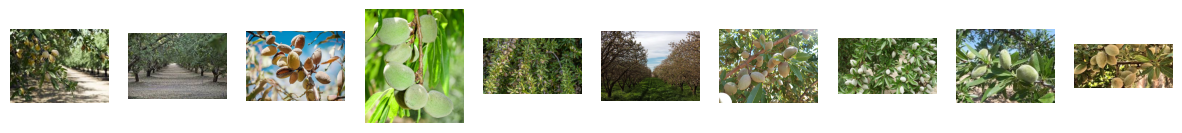

Crop: banana


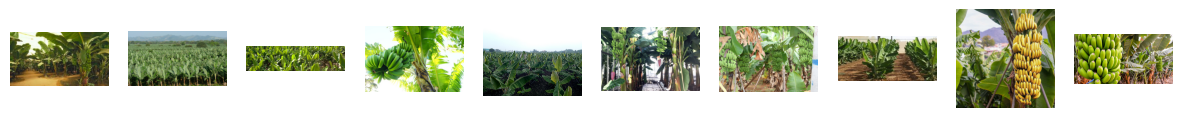

Crop: cardamom


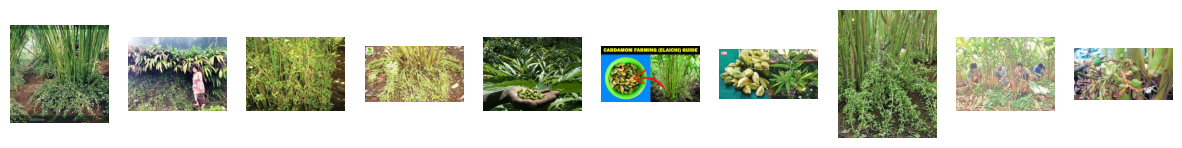

Crop: Cherry


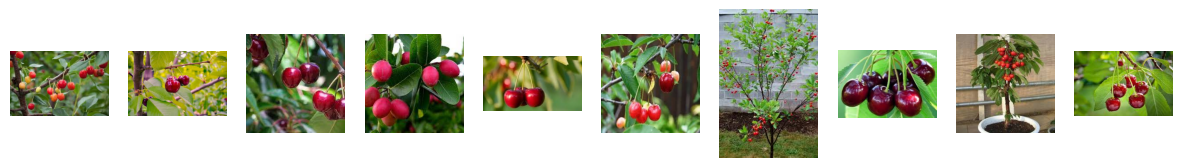

Crop: chilli


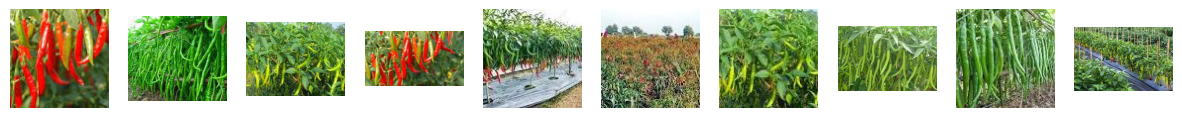

Crop: clove


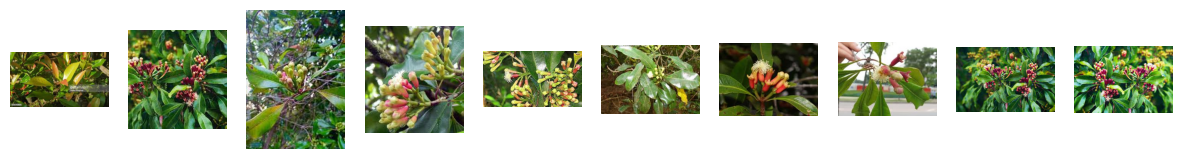

Crop: coconut


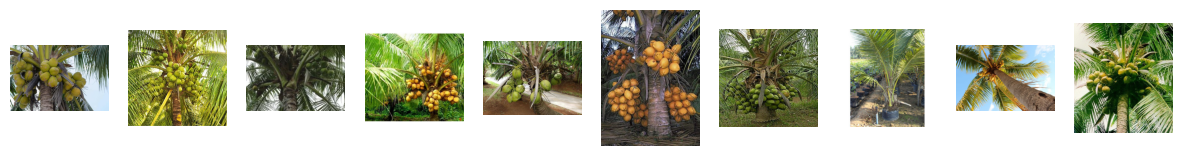

Crop: Coffee-plant


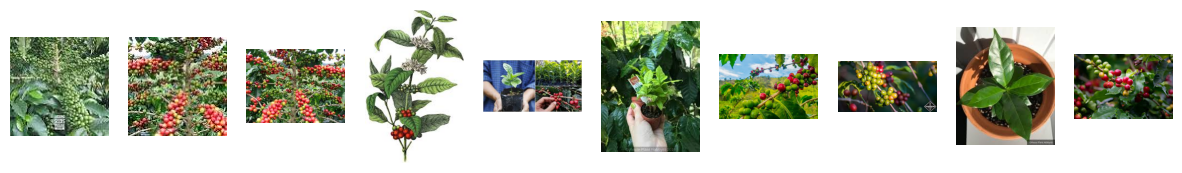

Crop: cotton


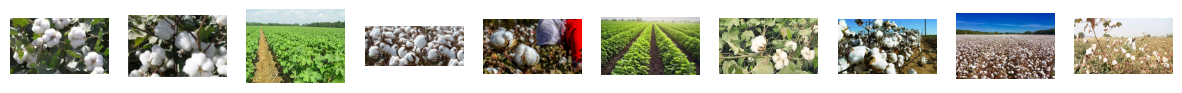

Crop: Cucumber


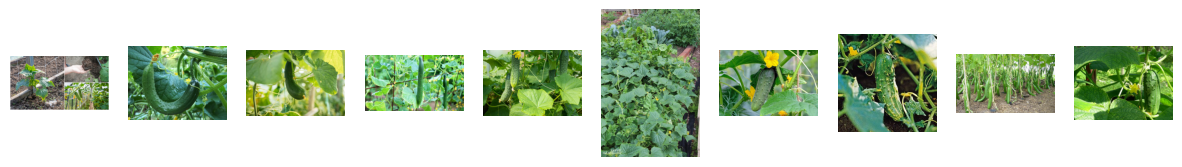

Crop: Fox_nut(Makhana)


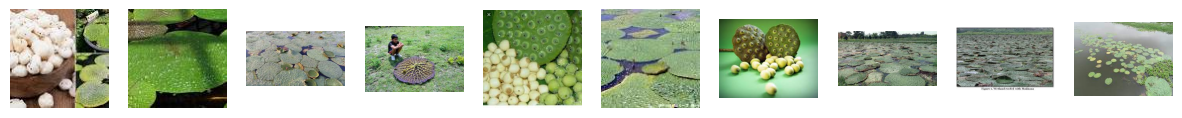

Crop: gram


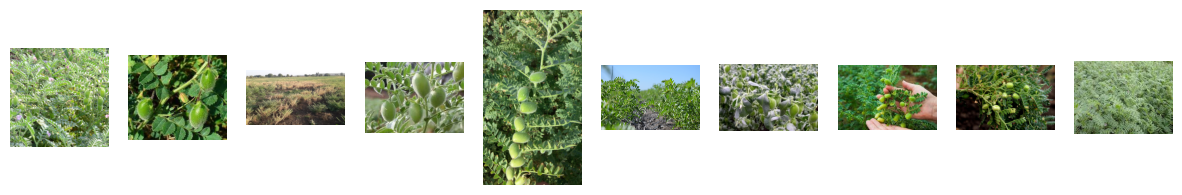

Crop: jowar


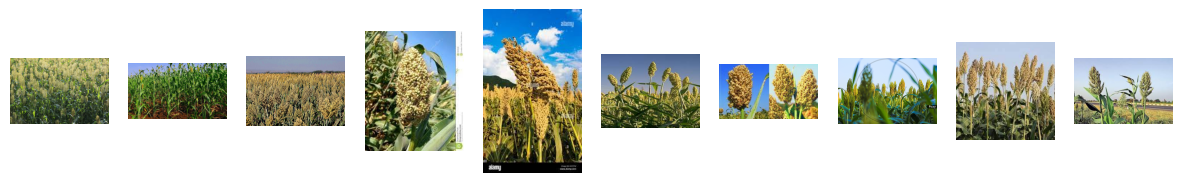

Crop: jute


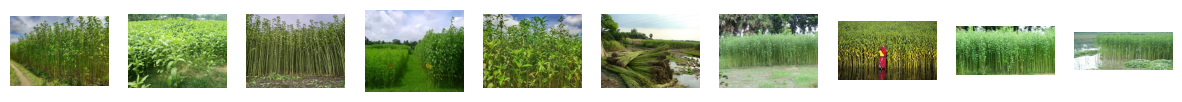

Crop: Lemon


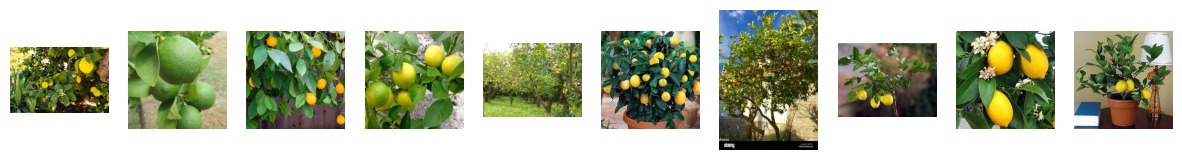

Crop: maize


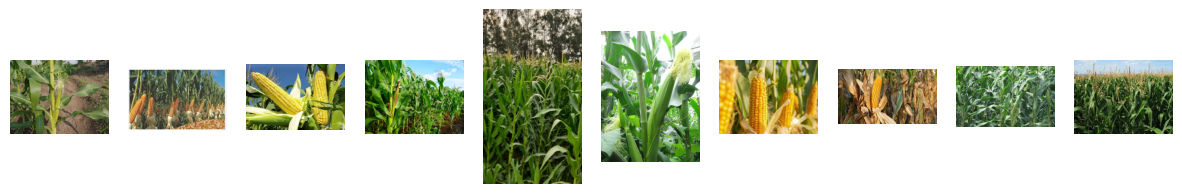

Crop: mustard-oil


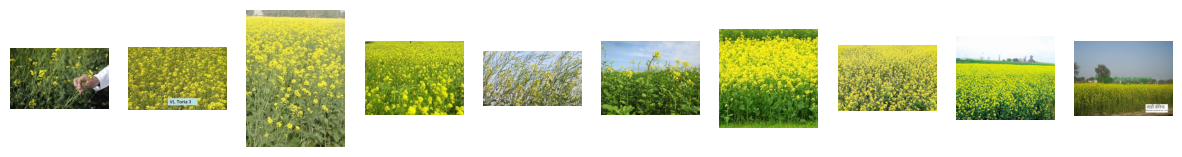

Crop: Olive-tree


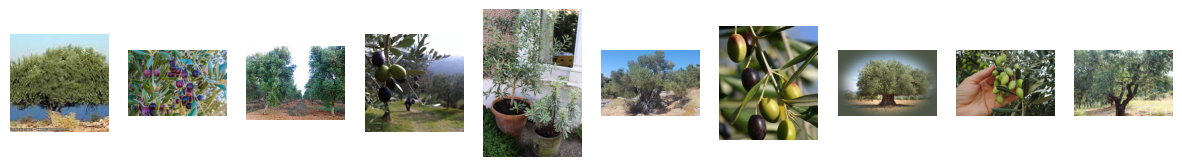

Crop: papaya


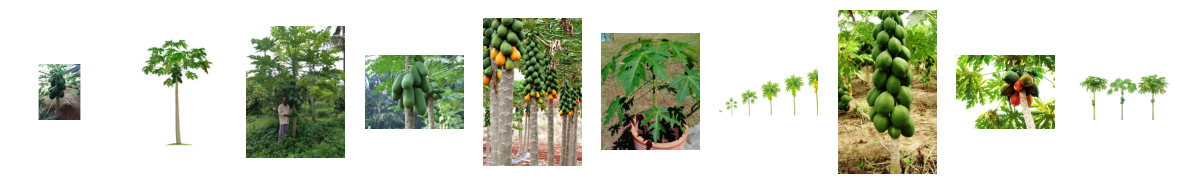

Crop: Pearl_millet(bajra)


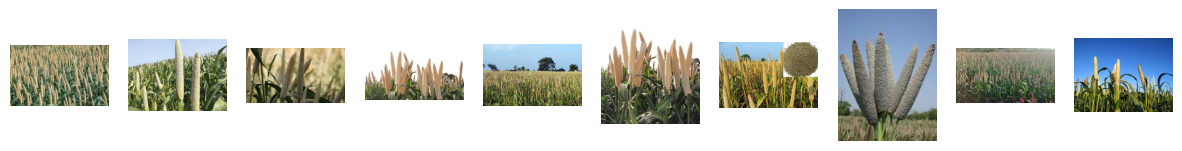

Crop: pineapple


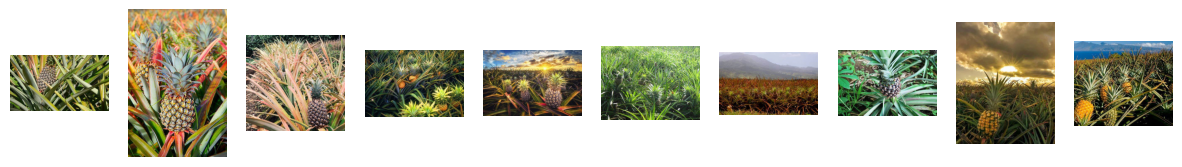

Crop: rice


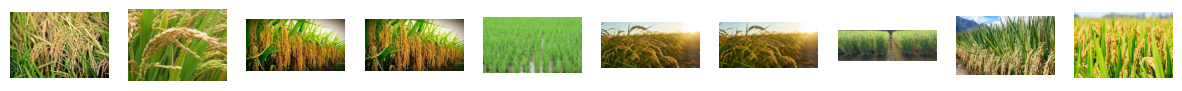

Crop: soyabean


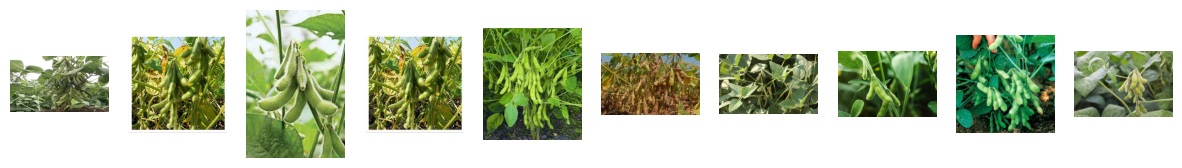

Crop: sugarcane


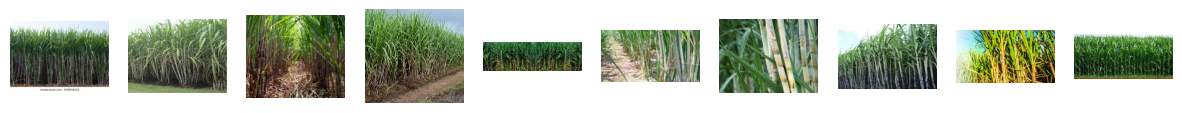

Crop: sunflower


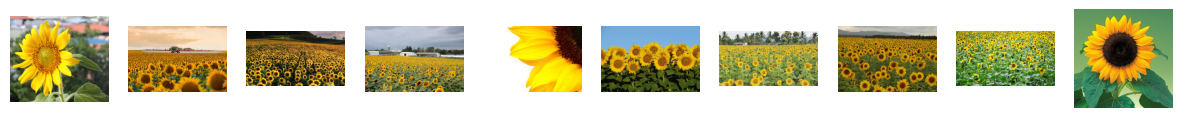

Crop: tea


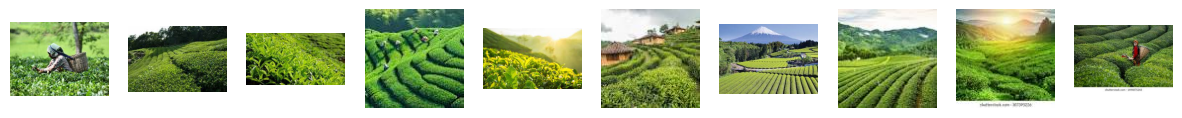

Crop: Tobacco-plant


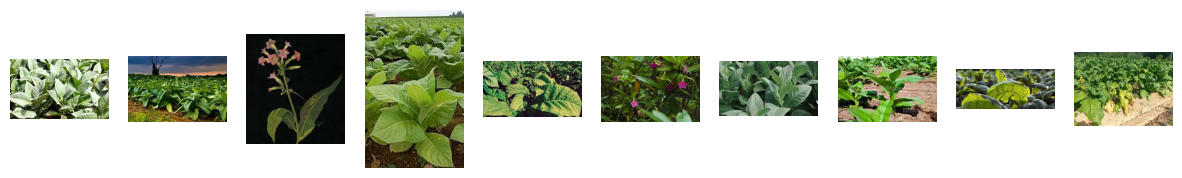

Crop: tomato


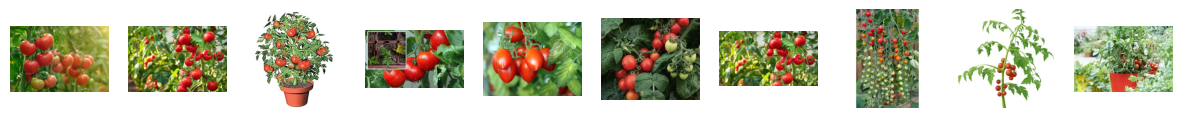

Crop: vigna-radiati(Mung)


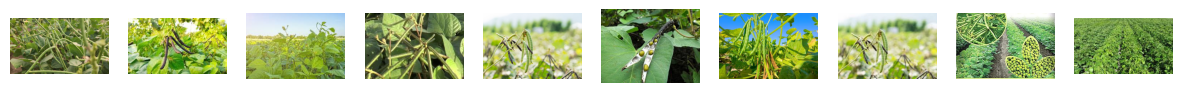

Crop: wheat


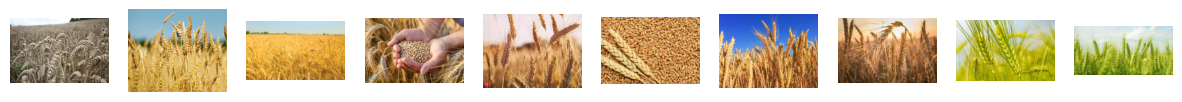

In [44]:
num_images_per_crop = 10

for subfolder in subfolders:
    crop_dir = os.path.join(path, subfolder)
    image_files = [os.path.join(crop_dir, filename) for filename in os.listdir(crop_dir) if os.path.isfile(os.path.join(crop_dir, filename))]

    if len(image_files) >= num_images_per_crop:
        random_images = random.sample(image_files, num_images_per_crop)

        print(f"Crop: {subfolder}")

        plt.figure(figsize=(15, 5))

        for i, image_path in enumerate(random_images):
            plt.subplot(1, num_images_per_crop, i + 1)
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.axis('off')

        plt.show()

In [45]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [46]:
train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 829 images belonging to 30 classes.


In [47]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializer, input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu', kernel_initializer=initializer, kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(30, activation='softmax')
])

In [48]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
num_epochs = 50
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    verbose=1
)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.0957 - loss: 13.9513
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.1904 - loss: 11.1081
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.2475 - loss: 8.8326
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.2447 - loss: 8.3437
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 464s 18s/step - accuracy: 0.3100 - loss: 7.7552
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3265 - loss: 7.0309
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3400 - loss: 6.9091
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3476 - loss: 6.2845
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.3843 - loss: 6.0474
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.3953 - loss: 6.3250
Epoch 11/100
 3/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.3264 - loss: 6.2686

In [ ]:
history.history

{'accuracy': [0.10373944789171219,
  0.1580217182636261,
  0.21712906658649445,
  0.2665862441062927,
  0.2726176083087921,
  0.31242460012435913,
  0.3112183213233948,
  0.3268998861312866,
  0.35464414954185486,
  0.3908323347568512],
 'loss': [15.64924430847168,
  12.593793869018555,
  10.700456619262695,
  8.811750411987305,
  7.973404884338379,
  7.329078674316406,
  7.094969272613525,
  6.915659427642822,
  6.296948432922363,
  6.585721969604492]}

In [ ]:
train_loss, train_accuracy = model.evaluate(train_generator, steps=len(train_generator))

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 465ms/step - accuracy: 0.2567 - loss: 7.7407
Training Loss: 7.5702
Training Accuracy: 0.2425
